In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [61]:
cr_loan = pd.read_csv('./cr_loan_w2.csv')
X_train, X_test, y_train, y_test = train_test_split(cr_loan[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']], cr_loan['loan_status'], test_size=0.2, random_state=1234)  

In [62]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.009491
1            0      0.000978
2            0      0.005885
3            1      0.995773
4            0      0.268952


In [63]:
len(gbt_preds)

5892

In [12]:
df = pd.read_csv('./protfolio.csv')
portfolio = df[['gbt_prob_default', 'lr_prob_default', 'lgd', 'loan_amnt']]

In [13]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

   gbt_prob_default  lr_prob_default  lgd  loan_amnt
0          0.990942         0.445779  0.2      15000
1          0.983987         0.223447  0.2      11200
2          0.000807         0.288558  0.2      15000
3          0.001239         0.169358  0.2      10800
4          0.084892         0.114182  0.2       3000
LR expected loss:  5596776.9798528785
GBT expected loss:  5383982.80945674


In [15]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)
from sklearn.metrics import confusion_matrix, classification_report
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 0 ... 1 1 1]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      4595
     Default       0.94      0.74      0.83      1297

    accuracy                           0.93      5892
   macro avg       0.93      0.86      0.89      5892
weighted avg       0.93      0.93      0.93      5892



In [16]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type='weight'))

{'person_age': 342.0, 'person_income': 718.0, 'person_emp_length': 307.0, 'loan_amnt': 355.0, 'loan_int_rate': 533.0, 'loan_percent_income': 320.0, 'cb_person_cred_hist_length': 184.0, 'person_home_ownership_MORTGAGE': 57.0, 'person_home_ownership_OTHER': 1.0, 'person_home_ownership_OWN': 50.0, 'person_home_ownership_RENT': 72.0, 'loan_intent_DEBTCONSOLIDATION': 65.0, 'loan_intent_EDUCATION': 41.0, 'loan_intent_HOMEIMPROVEMENT': 49.0, 'loan_intent_MEDICAL': 83.0, 'loan_intent_PERSONAL': 53.0, 'loan_intent_VENTURE': 32.0, 'loan_grade_A': 7.0, 'loan_grade_B': 38.0, 'loan_grade_C': 67.0, 'loan_grade_D': 36.0, 'loan_grade_E': 28.0, 'loan_grade_F': 13.0, 'loan_grade_G': 15.0, 'cb_person_default_on_file_N': 33.0}


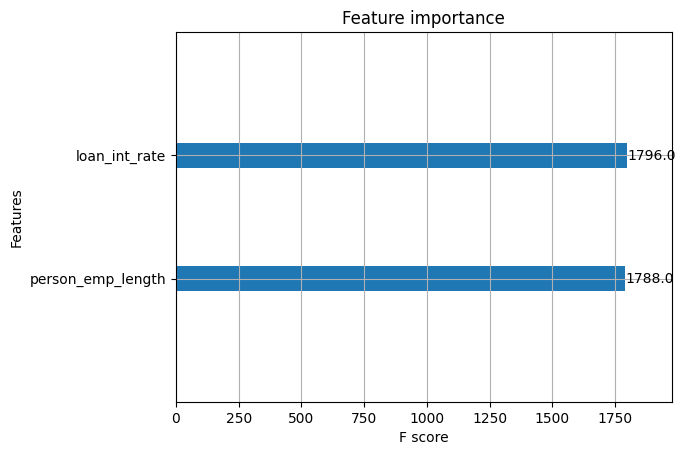

In [20]:
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X_train[['loan_int_rate' ,'person_emp_length']],np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

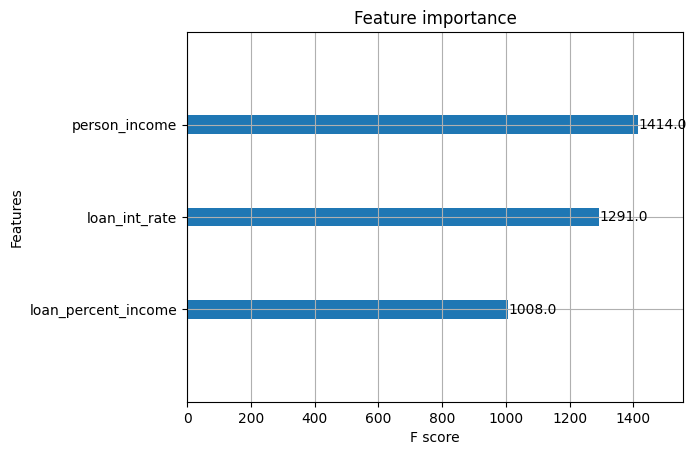

In [23]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X_train[['person_income', 'loan_int_rate', 'loan_percent_income']],np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [27]:
# Predict the loan_status using each model
gbt_preds = clf_gbt.predict(X_test)
gbt2_preds = clf_gbt2.predict(X_test[['loan_int_rate' ,'person_emp_length']])

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      4595
     Default       0.94      0.74      0.83      1297

    accuracy                           0.93      5892
   macro avg       0.93      0.86      0.89      5892
weighted avg       0.93      0.93      0.93      5892

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      4595
     Default       0.68      0.29      0.41      1297

    accuracy                           0.81      5892
   macro avg       0.75      0.63      0.65      5892
weighted avg       0.79      0.81      0.78      5892



In [28]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.902412       0.001504       0.897653      0.006441
1        0.909224       0.001760       0.903507      0.006299
2        0.916744       0.001708       0.909638      0.005753
3        0.922736       0.001400       0.915143      0.005277
4        0.926745       0.001167       0.918822      0.005828


In [31]:
cv_results_big  = pd.read_csv('./cv_results.csv')

   Unnamed: 0  train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0        0.897568       0.000909       0.892900      0.008258
1           1        0.906985       0.002611       0.901162      0.007519
2           2        0.913678       0.001403       0.907910      0.007753
3           3        0.919123       0.000921       0.912130      0.007145
4           4        0.922864       0.001097       0.914962      0.006706
0.94


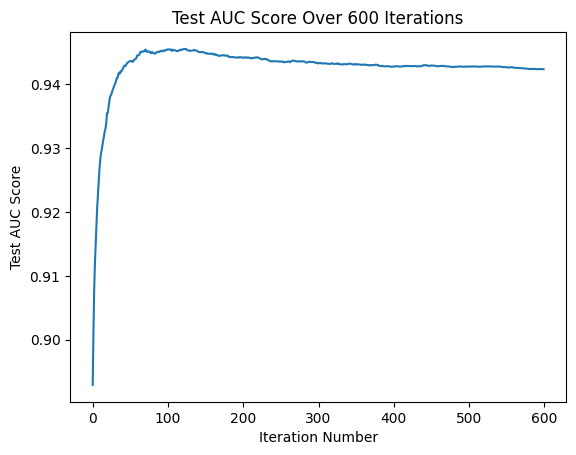

In [32]:
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [34]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)
from sklearn.model_selection import cross_val_score
# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.93194162 0.93516633 0.93516633 0.93498557]
Average accuracy: 0.93 (+/- 0.00)


In [46]:
X_y_train = pd.concat([X_train, y_train], axis = 1)

In [49]:
X_y_train['loan_status'].value_counts()[1]

5166

In [51]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]
count_default = X_y_train['loan_status'].value_counts()[1]
# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

loan_status
0    5166
1    5166
Name: count, dtype: int64


In [52]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      4595
     Default       0.94      0.74      0.83      1297

    accuracy                           0.93      5892
   macro avg       0.93      0.86      0.89      5892
weighted avg       0.93      0.93      0.93      5892

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      4595
     Default       0.68      0.29      0.41      1297

    accuracy                           0.81      5892
   macro avg       0.75      0.63      0.65      5892
weighted avg       0.79      0.81      0.78      5892



In [53]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test,gbt2_preds))

[[4532   63]
 [ 342  955]]
[[4414  181]
 [ 917  380]]


In [55]:
from sklearn.metrics import roc_auc_score
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))

0.8613020085692018
0.626796583393669
